In [1]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
dir = 'c.csv'
df = pd.read_csv('c.csv'.format(dir))

In [3]:
df.head(1)

DR_NO               Date Rptd                DATE OCC  TIME OCC  AREA  \
0  190326475  03/01/2020 12:00:00 AM  03/01/2020 12:00:00 AM      2130     7   

  AREA NAME  Rpt Dist No  Part 1-2  Crm Cd       Crm Cd Desc  ... Status  \
0  Wilshire          784         1     510  VEHICLE - STOLEN  ...     AA   

    Status Desc Crm Cd 1 Crm Cd 2  Crm Cd 3 Crm Cd 4  \
0  Adult Arrest    510.0    998.0       NaN      NaN   

                                  LOCATION Cross Street      LAT       LON  
0  1900 S  LONGWOOD                     AV          NaN  34.0375 -118.3506  

[1 rows x 28 columns]

# Lets manipulate the dataset.
data Date Rptd masih berbentuk 03/01/2020 12:00:00 AM. Data ini akan dipisah menjadi waktu, hari, tanggal, dan tahun

In [4]:
# Lets manipulate the dataset.

df[['date','time']] = df['Date Rptd'].str.split(n=1, expand=True)
df.head(1)

DR_NO               Date Rptd                DATE OCC  TIME OCC  AREA  \
0  190326475  03/01/2020 12:00:00 AM  03/01/2020 12:00:00 AM      2130     7   

  AREA NAME  Rpt Dist No  Part 1-2  Crm Cd       Crm Cd Desc  ... Crm Cd 1  \
0  Wilshire          784         1     510  VEHICLE - STOLEN  ...    510.0   

   Crm Cd 2 Crm Cd 3 Crm Cd 4                                 LOCATION  \
0     998.0      NaN      NaN  1900 S  LONGWOOD                     AV   

  Cross Street      LAT       LON        date         time  
0          NaN  34.0375 -118.3506  03/01/2020  12:00:00 AM  

[1 rows x 30 columns]

In [5]:
df[['month', 'date1', 'year']]=df['date'].str.split("/",expand = True)
df.head(1)

DR_NO               Date Rptd                DATE OCC  TIME OCC  AREA  \
0  190326475  03/01/2020 12:00:00 AM  03/01/2020 12:00:00 AM      2130     7   

  AREA NAME  Rpt Dist No  Part 1-2  Crm Cd       Crm Cd Desc  ... Crm Cd 4  \
0  Wilshire          784         1     510  VEHICLE - STOLEN  ...      NaN   

                                  LOCATION Cross Street      LAT       LON  \
0  1900 S  LONGWOOD                     AV          NaN  34.0375 -118.3506   

         date         time month date1  year  
0  03/01/2020  12:00:00 AM    03    01  2020  

[1 rows x 33 columns]

In [6]:
df.columns = df.columns.str.replace(" ","_")
df.columns

Index(['DR_NO', 'Date_Rptd', 'DATE_OCC', 'TIME_OCC', 'AREA', 'AREA_NAME',
       'Rpt_Dist_No', 'Part_1-2', 'Crm_Cd', 'Crm_Cd_Desc', 'Mocodes',
       'Vict_Age', 'Vict_Sex', 'Vict_Descent', 'Premis_Cd', 'Premis_Desc',
       'Weapon_Used_Cd', 'Weapon_Desc', 'Status', 'Status_Desc', 'Crm_Cd_1',
       'Crm_Cd_2', 'Crm_Cd_3', 'Crm_Cd_4', 'LOCATION', 'Cross_Street', 'LAT',
       'LON', 'date', 'time', 'month', 'date1', 'year'],
      dtype='object')

In [7]:
def change_to_time(a):
    s = str(a)
    if len(s) < 4:
        h = s[0:2]
        if int(h) > 23:
            s = "0"+ s
    return s[:2]+":"+ s[2:]

In [8]:
df['CORD'] = df['LAT'].astype(str) +","+ df['LON'].astype(str)
df['DATE_OCC'] = pd.to_datetime(df['DATE_OCC'])
df['TIME_OCC'] = df['TIME_OCC'].apply( lambda x: change_to_time(x))
df['len_time'] = df['TIME_OCC'].apply( lambda x: len(str(x)))
df['hour'] = df['TIME_OCC'].apply( lambda x: (str(x[:2])))
df['min'] = df['TIME_OCC'].apply( lambda x: (str(x[3:])))
df['month'] = df['DATE_OCC'].apply( lambda x: x.month)
df['day'] = df['DATE_OCC'].apply( lambda x: x.day)
df['year'] = df['DATE_OCC'].apply( lambda x: x.year)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7720\2556494871.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATE_OCC'] = pd.to_datetime(df['DATE_OCC'])


In [9]:
# Menggunakan apply dengan lambda
df['crime_category'] = df['Crm_Cd_Desc'].apply(lambda x: 'HOMICIDE' if x in ['CRIMINAL HOMICIDE', 'MANSLAUGHTER, NEGLIGENT']
                                               else 'RAPE' if x in ['SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH', 'SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ', 
                                                                    'RAPE, FORCIBLE', 'SEXUAL PENETRATION W/FOREIGN OBJECT', 'BATTERY WITH SEXUAL CONTACT', 'INTIMATE PARTNER - AGGRAVATED ASSAULT'
                                                                   'ORAL COPULATION', 'SEX OFFENDER REGISTRANT OUT OF COMPLIANCE', 'PEEPING TOM', 'RAPE, ATTEMPTED', 'INDECENT EXPOSURE',
                                                                   'PIMPING', 'CHILD PORNOGRAPHY', 'INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES)']
                                               else 'ROBBERY' if x in ['ROBBERY', 'ATTEMPTED ROBBERY']
                                               else 'AGG. ASSAULTS' if x in ['FALSE POLICE REPORT', 'CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT', 'DISCHARGE FIREARMS/SHOTS FIRED', 
                                                                            'FIREARMS RESTRAINING ORDER (FIREARMS RO)','SHOTS FIRED AT INHABITED DWELLING', 'SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT']
                                               else 'SIMPLE ASSAULT' if x in ['BATTERY - SIMPLE ASSAULT', 'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)', 'INTIMATE PARTNER - SIMPLE ASSAULT', 'CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT'
                                                                             'THREATENING PHONE CALLS/LETTERS', 'RESISTING ARREST', 'BATTERY POLICE (SIMPLE)', 'ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER', 'VIOLATION OF TEMPORARY RESTRAINING ORDER',
                                                                             'THROWING OBJECT AT MOVING VEHICLE', 'BATTERY ON A FIREFIGHTER', 'LYNCHING - ATTEMPTED']
                                               else 'BURGLARY' if x in ['BURGLARY FROM VEHICLE', 'BURGLARY', 'BURGLARY, ATTEMPTED', 'BURGLARY FROM VEHICLE, ATTEMPTED']
                                               else 'MVT (GTA)' if x in ['VEHICLE - STOLEN', 'VEHICLE - ATTEMPT STOLEN']
                                               else 'BTFV' if x in ['THEFT, PERSON', 'DEFRAUDING INNKEEPER/THEFT OF SERVICES, $950 & UNDER', 'THEFT FROM MOTOR VEHICLE - ATTEMPT']
                                               else 'PERSONAL THFT' if x in ['THEFT PLAIN - ATTEMPT', 'PICKPOCKET', 'THEFT FROM PERSON - ATTEMPT', 'PURSE SNATCHING', 'PURSE SNATCHING - ATTEMPT', 'DRUNK ROL',
                                                                            'PICKPOCKET, ATTEMPT']
                                               else 'OTHER THEFT' if x in ['BIKE - STOLEN', 'SHOPLIFTING-GRAND THEFT ($950.01 & OVER)', 'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD', 'THEFT PLAIN - PETTY ($950 & UNDER)',
                                                                          'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER', 'BUNCO, GRAND THEFT', 'SHOPLIFTING - PETTY THEFT ($950 & UNDER)', 'CREDIT CARDS, FRAUD USE ($950.01 & OVER)'
                                                                          'CREDIT CARDS, FRAUD USE ($950 & UNDER', 'EMBEZZLEMENT, PETTY THEFT ($950 & UNDER)', 'VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)', 'BUNCO, PETTY THEFT'
                                                                          'TILL TAP - GRAND THEFT ($950.01 & OVER', 'DISHONEST EMPLOYEE - PETTY THEFT', 'SHOPLIFTING - ATTEMPT', 'DEFRAUDING INNKEEPER/THEFT OF SERVICES, OVER $950.01', 
                                                                          'BOAT - STOLEN', 'THEFT, COIN MACHINE - PETTY ($950 & UNDER)', 'PETTY THEFT - AUTO REPAIR', 'THEFT, COIN MACHINE - ATTEMPT', 'TILL TAP - PETTY ($950 & UNDER)'
                                                                          'BIKE - ATTEMPTED STOLEN', 'GRAND THEFT / AUTO REPAIR', 'GRAND THEFT / INSURANCE FRAUD', 'THEFT, COIN MACHINE - GRAND ($950.01 & OVER)', 'DISRUPT SCHOOL'
                                                                          'DISHONEST EMPLOYEE ATTEMPTED THEFT']
                                               else 'OTHER')
df.head(1)

DR_NO               Date_Rptd   DATE_OCC TIME_OCC  AREA AREA_NAME  \
0  190326475  03/01/2020 12:00:00 AM 2020-03-01    21:30     7  Wilshire   

   Rpt_Dist_No  Part_1-2  Crm_Cd       Crm_Cd_Desc  ...         time  month  \
0          784         1     510  VEHICLE - STOLEN  ...  12:00:00 AM      3   

  date1  year               CORD len_time  hour min day crime_category  
0    01  2020  34.0375,-118.3506        5    21  30   1      MVT (GTA)  

[1 rows x 39 columns]

In [10]:
def bagi_waktu(hhmm):
    # Konversi string HH:MM menjadi jam
    hour = int(hhmm.split(':')[0])
    if 0 <= hour < 6:
        return '00.00 - 05.59'
    elif 6 <= hour < 12:
        return '06.00 - 11.59 '
    elif 12 <= hour < 18:
        return '12.00 - 17.59 '
    elif 18 <= hour <= 23.59:
        return '18.00 - 23.59'
    else:
        return 'Tidak Valid'

# Terapkan fungsi ke kolom 'waktu'
df['time'] = df['TIME_OCC'].apply(bagi_waktu)

# Output hasil
df.head(1)

DR_NO               Date_Rptd   DATE_OCC TIME_OCC  AREA AREA_NAME  \
0  190326475  03/01/2020 12:00:00 AM 2020-03-01    21:30     7  Wilshire   

   Rpt_Dist_No  Part_1-2  Crm_Cd       Crm_Cd_Desc  ...           time  month  \
0          784         1     510  VEHICLE - STOLEN  ...  18.00 - 23.59      3   

  date1  year               CORD len_time  hour min day crime_category  
0    01  2020  34.0375,-118.3506        5    21  30   1      MVT (GTA)  

[1 rows x 39 columns]

Text(0.5, 1.0, 'Sex Most affected by crimes')

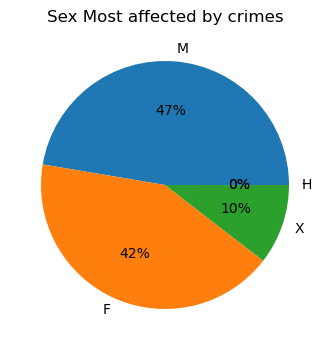

In [11]:
plt.figure(figsize=(4,12))
plt.pie(x=df['Vict_Sex'].value_counts(), labels=df['Vict_Sex'].value_counts().keys(), autopct='%.0f%%')
plt.xticks(rotation=45)
plt.title("Sex Most affected by crimes")

In [12]:
df["Vict_Sex"].unique()

array(['M', 'X', 'F', nan, 'H', '-'], dtype=object)

In [13]:
df_new = df.query("Vict_Age >0")
df_new22 = df.query("Vict_Age > 0 and year == 2022")
df_new23 = df.query("Vict_Age > 0 and year == 2023")

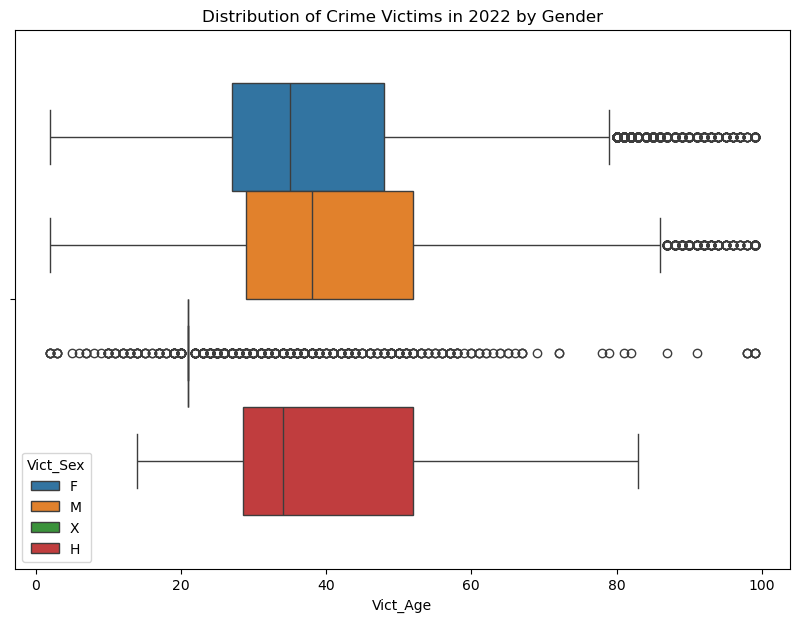

In [14]:
fig = plt.figure(figsize =(10, 7))
 
plt.title("Distribution of Crime Victims in 2022 by Gender")
a = sns.boxplot(x=df_new22['Vict_Age'],hue=df_new22['Vict_Sex'])
plt.show()

In [15]:
df['Vict_Sex'].unique()

array(['M', 'X', 'F', nan, 'H', '-'], dtype=object)

<Figure size 1500x800 with 0 Axes>

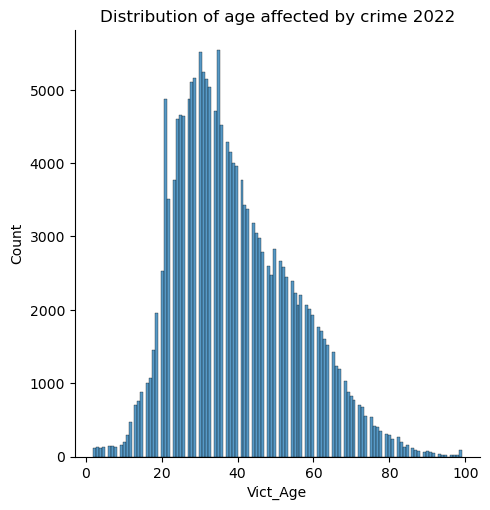

In [16]:
plt.figure(figsize=(15,8))
a = sns.displot(x=df_new22['Vict_Age'])
plt.title("Distribution of age affected by crime 2022")
plt.xticks(rotation=0)

a.set(frame_on=True)

<Figure size 1500x800 with 0 Axes>

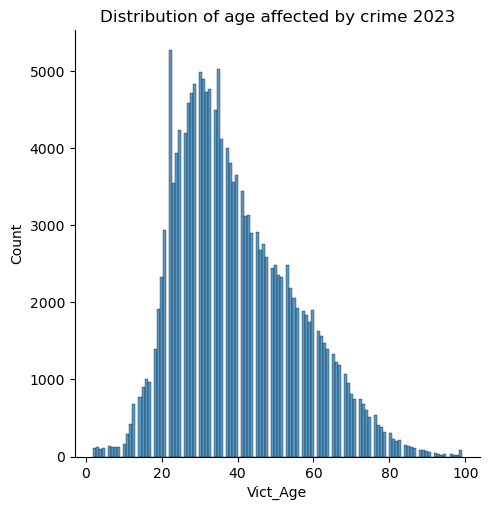

In [17]:
plt.figure(figsize=(15,8))
a = sns.displot(x=df_new23['Vict_Age'])
plt.title("Distribution of age affected by crime 2023")
plt.xticks(rotation=0)

a.set(frame_on=True)

([0, 1, 2, 3],
 [Text(0, 0, '12.00 - 17.59 '),
  Text(1, 0, '00.00 - 05.59'),
  Text(2, 0, '06.00 - 11.59 '),
  Text(3, 0, '18.00 - 23.59')])

<Figure size 1500x1000 with 0 Axes>

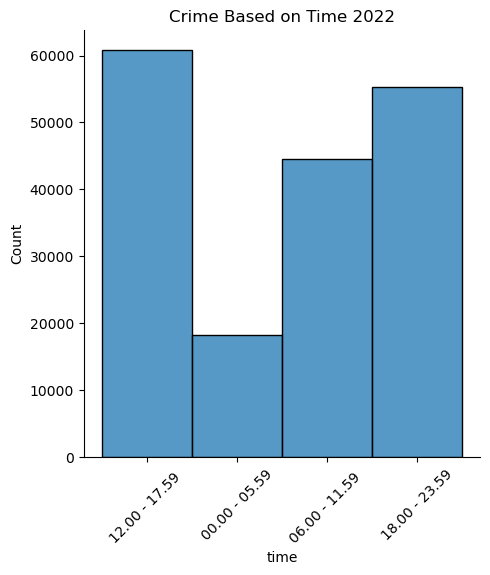

In [18]:
plt.figure(figsize=(15,10))
a = sns.displot(x=df_new22['time'])
plt.title("Crime Based on Time 2022")
plt.xticks(rotation=45)

# a.set(frame_on=False)

([0, 1, 2, 3],
 [Text(0, 0, '12.00 - 17.59 '),
  Text(1, 0, '06.00 - 11.59 '),
  Text(2, 0, '18.00 - 23.59'),
  Text(3, 0, '00.00 - 05.59')])

<Figure size 1500x800 with 0 Axes>

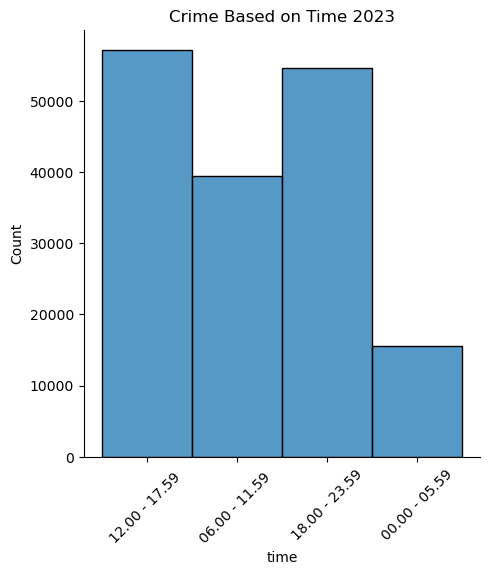

In [19]:
plt.figure(figsize=(15,8))
a = sns.displot(x=df_new23['time'])
plt.title("Crime Based on Time 2023")
plt.xticks(rotation=45)

# a.set(frame_on=False)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7720\3947136891.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a = sns.countplot(x=df_new23['crime_category'],palette="Paired")


[None]

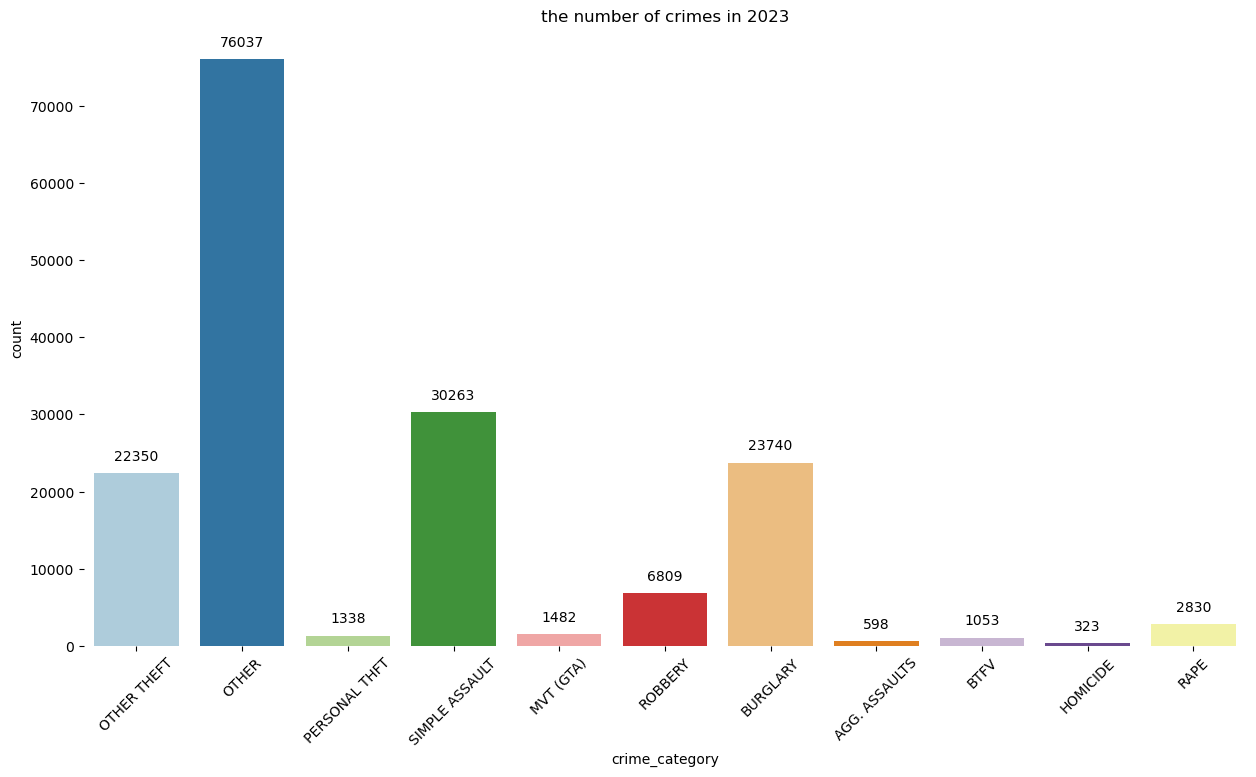

In [20]:
plt.figure(figsize=(15,8))
a = sns.countplot(x=df_new23['crime_category'],palette="Paired")
plt.title("Distribution of age affected by crime")
plt.xticks(rotation=45)
plt.bar_label(a.containers[0],padding=7.0)
plt.title("the number of crimes in 2023")
plt.bar_label(a.containers[1],padding=7.0)
plt.bar_label(a.containers[2],padding=7.0)
plt.bar_label(a.containers[3],padding=7.0)
plt.bar_label(a.containers[4],padding=7.0)
plt.bar_label(a.containers[5],padding=7.0)
plt.bar_label(a.containers[6],padding=7.0)
plt.bar_label(a.containers[7],padding=7.0)
plt.bar_label(a.containers[8],padding=7.0)
plt.bar_label(a.containers[9],padding=7.0)
plt.bar_label(a.containers[10],padding=7.0)
a.set(frame_on=False)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7720\951405690.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a = sns.countplot(x=df_new22['crime_category'],palette="Paired")


[None]

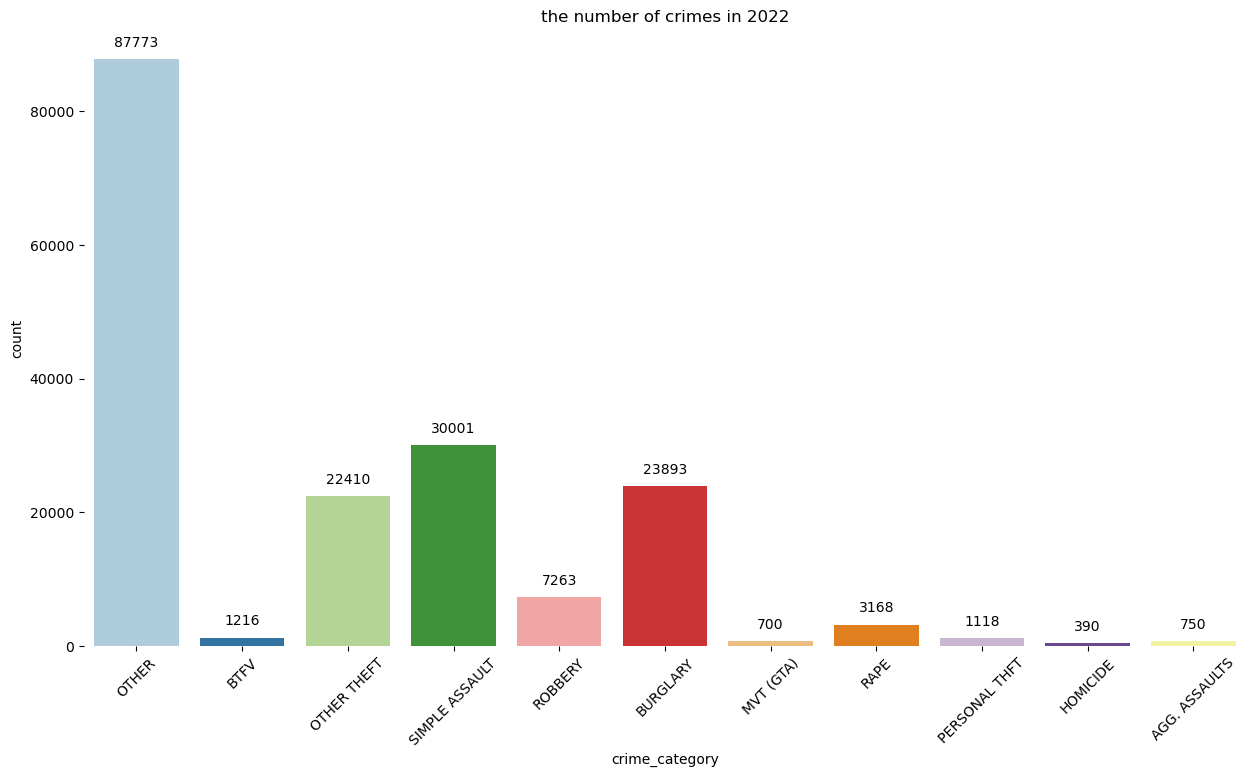

In [21]:
plt.figure(figsize=(15,8))
a = sns.countplot(x=df_new22['crime_category'],palette="Paired")
plt.title("Distribution of age affected by crime")
plt.xticks(rotation=45)
plt.bar_label(a.containers[0],padding=7.0)
plt.title("the number of crimes in 2022")
plt.bar_label(a.containers[1],padding=7.0)
plt.bar_label(a.containers[2],padding=7.0)
plt.bar_label(a.containers[3],padding=7.0)
plt.bar_label(a.containers[4],padding=7.0)
plt.bar_label(a.containers[5],padding=7.0)
plt.bar_label(a.containers[6],padding=7.0)
plt.bar_label(a.containers[7],padding=7.0)
plt.bar_label(a.containers[8],padding=7.0)
plt.bar_label(a.containers[9],padding=7.0)
plt.bar_label(a.containers[10],padding=7.0)
a.set(frame_on=False)

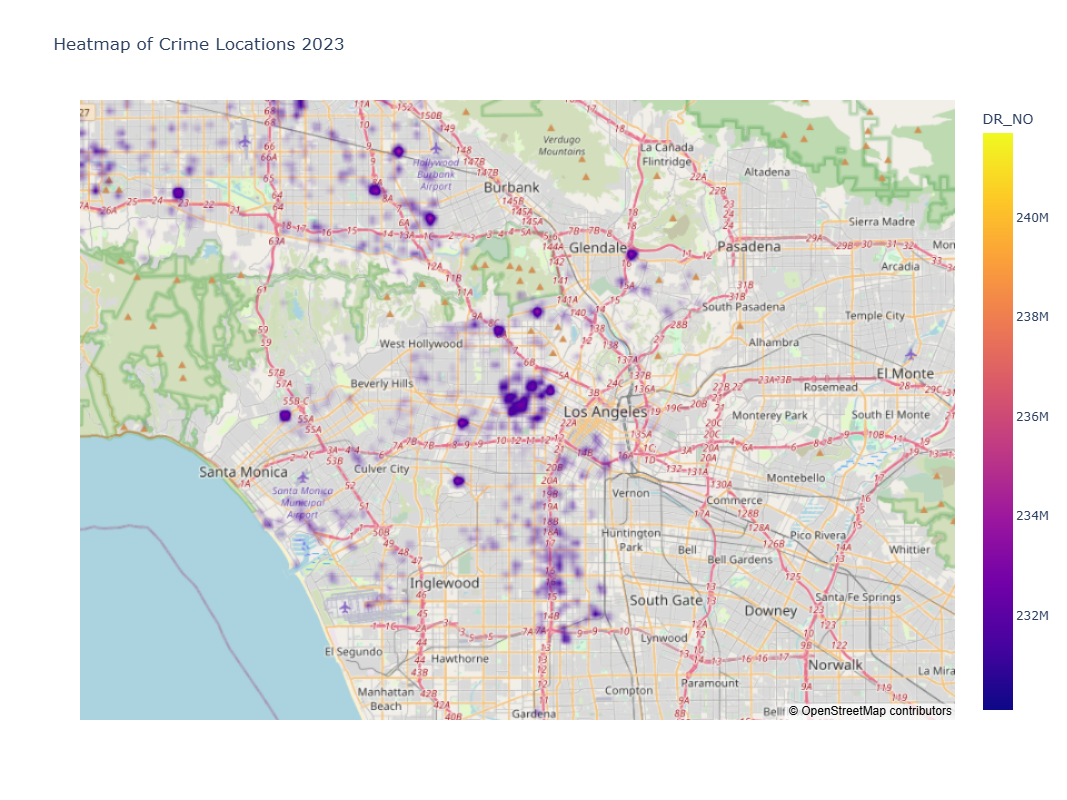

In [22]:
fig = px.density_mapbox(df_new23.head(1000), lat = 'LAT', lon = 'LON', z = 'DR_NO',
                        radius = 8,
                        center = dict(lat =34.0545 , lon =   -118.3031),
                        zoom = 10,
                        mapbox_style = 'open-street-map',
                        width=1100,
                        height=800,
                        title="Heatmap of Crime Locations 2023"
                        )

fig.show()

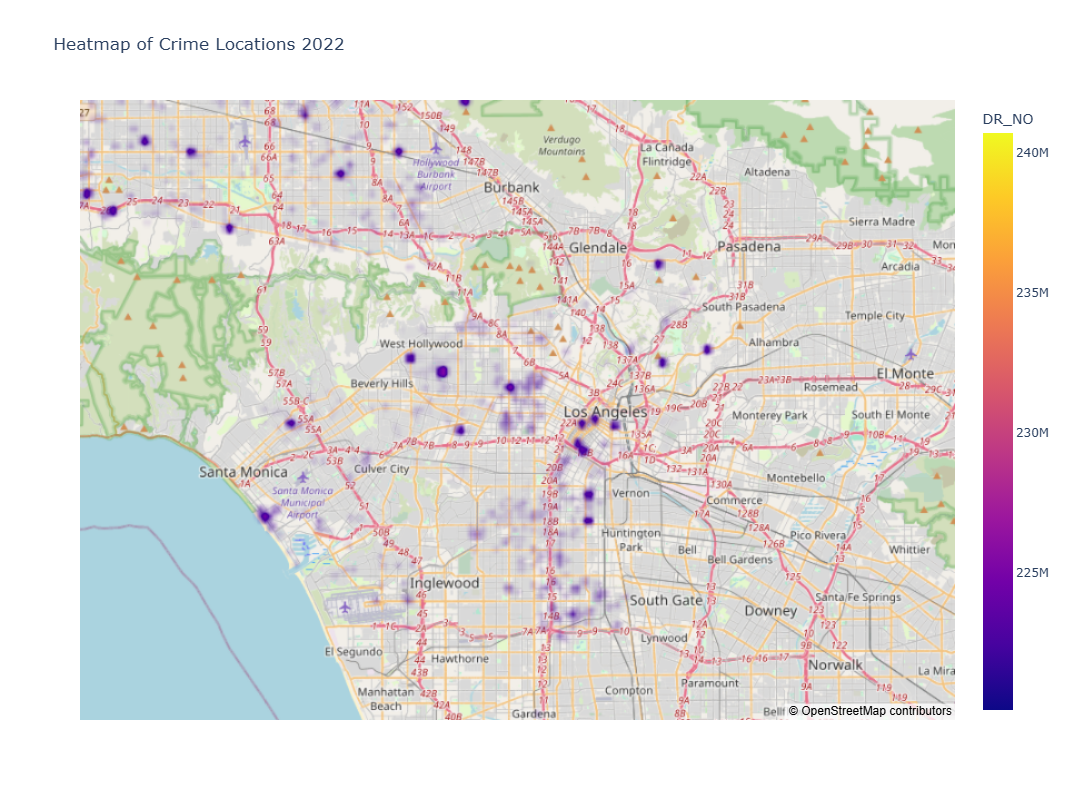

In [23]:
fig = px.density_mapbox(df_new22.head(1000), lat = 'LAT', lon = 'LON', z = 'DR_NO',
                        radius = 8,
                        center = dict(lat =34.0545 , lon =   -118.3031),
                        zoom = 10,
                        mapbox_style = 'open-street-map',
                        width=1100,
                        height=800,
                        title="Heatmap of Crime Locations 2022"
                        )

fig.show()

In [ ]:
#Pengelompokan dataset menjadi beberapa kelompok 